(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 합병과 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 종/횡 결합: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 종 결합. 즉 데이터프레임 여러 개의 위아래 결합.

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [5]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 횡 결합. 즉 데이터프레임 여러 개의 좌우 결합.

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [7]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


인덱스를 기존의 데이터프레임과 통일시키기 위해 리인덱싱을 활용할 수도 있다.

In [8]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [11]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [12]:
left

,key,lval
0,foo,1
1,foo,2


In [13]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [14]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [15]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [16]:
left

,key,lval
0,foo,1
1,bar,2


In [17]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [18]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [19]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [20]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [21]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [22]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [23]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키 활용**

- 두 개 이상의 키를 하나의 쌍으로 된 키를 사용하는 경우와 유사함. 

In [24]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [25]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [26]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [27]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [28]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [31]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [32]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [33]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [34]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [35]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [36]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [37]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [38]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [39]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [40]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [41]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 다중 인덱스<font size='2'>MultiIndex</font>

- 참고: [Multiindex / advanced indexing](https://pandas.pydata.org/docs/user_guide/advanced.html)

다중 인덱스를 이용하여 데이터를 보다 체계적으로 다를 수 있다.
또한 이어서 다룰 그룹 분류<font size='2'>Group by</font>, 
모양 변환<font size='2'>reshaping</font>, 
피벗 변환<font size='2'>pivoting</font> 등에서 유용하게 활용된다.

### `MultiIndex` 객체

다중 인덱스 객체는 보통 튜플을 이용한다.
예를 들어 아래 두 개의 리스트를 이용하여 튜플을 생성한 다음 다중 인덱스로 만들어보자.

In [42]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

- 튜플 생성: 항목 8개

In [43]:
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

**다중 인덱스 객체 생성: `from_tupes()` 함수**

튜플 리스트를 이용하여 다중 인덱스 객체를 생성할 수 있다.

In [44]:
index = pd.MultiIndex.from_tuples(tuples)
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           )

- `names` 키워드 인자
    - 다중 인덱스의 각 레벨<font size='2'>level</font>의 이름 지정. 
    - 지정되지 않으면 `None`으로 처리됨.

예를 들어 위 코드에서 사용된 각각의 레벨에 이름은 다음과 같다.

- `"first"`: 0-레벨 이름
- `"second"`: 1-레벨 이름

In [45]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

**다중 인덱스 객체 생성: `from_arrays()` 함수**

길이가 동일한 여러 개의 리스트로 구성된 어레이를 직접 이용할 수도 있다.

In [46]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

### 다중 인덱스 라벨<font size='2'>label</font>을 사용하는 시리즈/데이터프레임 객체

- 시리즈 생성

아래 코드는 길이가 8인 어레이를 이용하여 시리즈를 생성한다.
인덱스의 라벨은 다중 인덱스가 사용된다.
각각의 레벨에서 라벨이 연속적으로 사용되는 경우는 보다 자연스러운 표현을 위해 생략되기도 한다.

In [47]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       1.148883
       two      -0.393966
baz    one       1.992530
       two       2.198630
foo    one      -2.004613
       two       0.759286
qux    one      -0.076233
       two      -0.956568
dtype: float64

- 데이터프레임 생성

아래 코드는 8개의 행으로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.
`index` 또는 `columns`로 여러 개의 리스트로 구성된 어레이를 지정하면
자동으로 다중 인덱스 라벨이 지정된다.

In [48]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
bar one -2.394420  0.395872 -0.968487 -0.754600
    two  1.141961  1.218010  0.609494 -0.688906
baz one  2.385289 -0.769527  0.379183  0.171297
    two -1.260934 -0.186704  0.126080 -0.469745
foo one -1.744194  1.756575 -0.203448 -1.249204
    two -0.378236  0.652626  0.952954  1.061680
qux one  0.365942 -2.951655  0.915199  1.026129
    two  1.136309 -2.213010 -0.014468  0.273450

다중 인덱스를 열 라벨로도 활용할 수 있다.
아래 코드는 8개의 열로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.

In [49]:
df1 = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -1.835793 -0.311310  0.445440 -0.610850 -0.684921 -1.153596  1.183724   
B       0.782645 -1.640405 -0.582233  1.110078 -0.279484  0.242836  0.639857   
C       0.825619 -0.765692 -0.256529 -0.743385  0.552954 -0.464701  0.365082   

first             
second       two  
A      -0.726753  
B       1.584186  
C      -0.025869

인덱스 라벨과 열 라벨 모두 다중 인덱스를 이용할 수도 있다.

- 동일한 길이의 리스트로 이루어진 리스트를 인덱스 또는 열의 라벨로 지정하면
    다중 인덱스로 자동 지정된다.

In [50]:
arrays2 = [
    ["toto", "toto", "titi", "titi", "tata", "tata"],
    ["A", "B", "A", "B", "A", "B"],
]

In [51]:
pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=arrays2)

toto                titi                tata          
                     A         B         A         B         A         B
first second                                                            
bar   one     0.139764 -0.968292  1.431498 -0.149448  0.341639  0.103254
      two     1.060767 -0.621452 -0.213764  2.373998  0.102572 -1.469094
baz   one    -0.472358 -0.653102 -0.563449 -0.197265 -0.418286 -1.299144
      two    -0.954570  0.486236  0.698381  0.323784 -1.003209 -0.108361
foo   one    -0.241076 -3.898825 -0.472026  0.755932  0.374180 -0.326224
      two     0.512796 -0.141643 -2.288852 -1.414054  0.378083  0.548635

**주의사항**

튜플을 라벨로 사용하는 것은 다중 인덱스와 아무 상관 없다.
단지 라벨이 튜플인 것 뿐이다.

In [52]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [53]:
pd.Series(np.random.randn(8), index=tuples)

(bar, one)   -1.127573
(bar, two)    1.292450
(baz, one)    1.361016
(baz, two)   -0.296128
(foo, one)    0.017115
(foo, two)   -0.148278
(qux, one)    1.148436
(qux, two)    0.986084
dtype: float64

### 인덱스의 레벨

다중 인덱스 객체의 `get_level_values()` 메서드를 이용하여 레벨별 인덱스 라벨을 확인할 수 있다.

- 0-레블 라벨

In [54]:
index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

레벨 이름을 이용할 수도 있다.

In [55]:
index.get_level_values("first")

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

- 1-레블 라벨

In [56]:
index.get_level_values(1)

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [57]:
index.get_level_values("second")

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

### 인덱싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 인덱싱과 크게 다르지 않다.

- 시리즈 인덱싱

In [58]:
s

first  second
bar    one       1.148883
       two      -0.393966
baz    one       1.992530
       two       2.198630
foo    one      -2.004613
       two       0.759286
qux    one      -0.076233
       two      -0.956568
dtype: float64

In [59]:
s["qux"]

second
one   -0.076233
two   -0.956568
dtype: float64

- 데이터프레임 인덱싱

In [60]:
df

0         1         2         3
bar one -2.394420  0.395872 -0.968487 -0.754600
    two  1.141961  1.218010  0.609494 -0.688906
baz one  2.385289 -0.769527  0.379183  0.171297
    two -1.260934 -0.186704  0.126080 -0.469745
foo one -1.744194  1.756575 -0.203448 -1.249204
    two -0.378236  0.652626  0.952954  1.061680
qux one  0.365942 -2.951655  0.915199  1.026129
    two  1.136309 -2.213010 -0.014468  0.273450

In [61]:
df.loc["bar"]

,0,1,2,3
one,-2.394420,0.395872,-0.968487,-0.754600
two,1.141961,1.218010,0.609494,-0.688906


레벨별로 라벨을 지정할 수 있다. 각각의 라벨은 쉼표로 구분한다.

In [62]:
df.loc["bar", "one"]

0   -2.394420
1    0.395872
2   -0.968487
3   -0.754600
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다.

In [63]:
df.loc["bar"].loc["one"]

0   -2.394420
1    0.395872
2   -0.968487
3   -0.754600
Name: one, dtype: float64

- 데이터프레임 인덱싱: 열 라벨이 다중 인덱스인 경우

In [64]:
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -1.835793 -0.311310  0.445440 -0.610850 -0.684921 -1.153596  1.183724   
B       0.782645 -1.640405 -0.582233  1.110078 -0.279484  0.242836  0.639857   
C       0.825619 -0.765692 -0.256529 -0.743385  0.552954 -0.464701  0.365082   

first             
second       two  
A      -0.726753  
B       1.584186  
C      -0.025869

In [65]:
df1["bar"]

second,one,two
A,-1.835793,-0.311310
B,0.782645,-1.640405
C,0.825619,-0.765692


레벨별로 라벨을 지정한다. 각각의 라벨은 쉼표로 구분한다.

In [66]:
df1["bar", "one"]

A   -1.835793
B    0.782645
C    0.825619
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다

In [67]:
df1["bar"]["one"]

A   -1.835793
B    0.782645
C    0.825619
Name: one, dtype: float64

### 슬라이싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 슬라이싱과 크게 다르지 않다.

In [68]:
df

0         1         2         3
bar one -2.394420  0.395872 -0.968487 -0.754600
    two  1.141961  1.218010  0.609494 -0.688906
baz one  2.385289 -0.769527  0.379183  0.171297
    two -1.260934 -0.186704  0.126080 -0.469745
foo one -1.744194  1.756575 -0.203448 -1.249204
    two -0.378236  0.652626  0.952954  1.061680
qux one  0.365942 -2.951655  0.915199  1.026129
    two  1.136309 -2.213010 -0.014468  0.273450

- 0-레벨 인덱싱

In [69]:
df.loc["baz":"foo"]

0         1         2         3
baz one  2.385289 -0.769527  0.379183  0.171297
    two -1.260934 -0.186704  0.126080 -0.469745
foo one -1.744194  1.756575 -0.203448 -1.249204
    two -0.378236  0.652626  0.952954  1.061680

- (0, 1)-레벨 인덱싱

In [70]:
df.loc[("baz", "two"):("qux", "one")]

0         1         2         3
baz two -1.260934 -0.186704  0.126080 -0.469745
foo one -1.744194  1.756575 -0.203448 -1.249204
    two -0.378236  0.652626  0.952954  1.061680
qux one  0.365942 -2.951655  0.915199  1.026129

튜플들의 리스트를 지정하면 리인덱싱처럼 작동한다.

In [71]:
df.loc[[("bar", "two"), ("qux", "one")]]

,,0,1,2,3
bar,two,1.141961,1.218010,0.609494,-0.688906
qux,one,0.365942,-2.951655,0.915199,1.026129


이외에 `slice()` 함수와 `pd.IndexSlice` 객체를 사용하는 방법도 있지만 여기서는 다루지 않는다.

## 그룹 분류: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [72]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,1.693955,-0.702285
1,bar,one,-0.287086,-1.175214
2,foo,two,-0.491937,0.314579
3,bar,three,-1.102757,0.757558
4,foo,two,-1.452787,1.191215
5,bar,two,0.284376,1.190747
6,foo,one,-0.057879,1.369881
7,bar,three,0.655585,-1.291306


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | 경우의 수 |
    | :---: | :---: |
    | `bar` | 1 |
    | `foo` | 1 |

In [73]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-0.449882,-0.518214
foo,-0.308648,2.173391


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | `B` | 경우의 수 |
    | :---: | :---: | :---: |
    | `bar` | `one`, `three`, `two` | 3 |
    | `foo` | `one`, `two` | 2 |

In [74]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.287086 -1.175214
    three -0.447172 -0.533747
    two    0.284376  1.190747
foo one    1.636076  0.667597
    two   -1.944723  1.505794

**그룹 확인**

- `for` 반복문 활용 

In [75]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -0.287086 -1.175214
('bar', 'three')
     A      B         C         D
3  bar  three -1.102757  0.757558
7  bar  three  0.655585 -1.291306
('bar', 'two')
     A    B         C         D
5  bar  two  0.284376  1.190747
('foo', 'one')
     A    B         C         D
0  foo  one  1.693955 -0.702285
6  foo  one -0.057879  1.369881
('foo', 'two')
     A    B         C         D
2  foo  two -0.491937  0.314579
4  foo  two -1.452787  1.191215


- `get_group()` 메서드

In [76]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,-0.287086,-1.175214


In [77]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,-1.102757,0.757558
7,bar,three,0.655585,-1.291306


- `groups` 속성

In [78]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [79]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one    -0.287086  -1.175214    1
     three  -1.102757   0.757558    1
             0.655585  -1.291306    1
     two     0.284376   1.190747    1
foo  one    -0.057879   1.369881    1
             1.693955  -0.702285    1
     two    -1.452787   1.191215    1
            -0.491937   0.314579    1
dtype: int64

- `nunique` 속성

In [80]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [81]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one   -0.287086 -1.175214
    three -0.447172 -0.533747
    two    0.284376  1.190747
foo one    1.636076  0.667597
    two   -1.944723  1.505794

In [82]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one    1.636076  0.667597
bar one   -0.287086 -1.175214
foo two   -1.944723  1.505794
bar three -0.447172 -0.533747
    two    0.284376  1.190747

In [83]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산 예제**

- `max()` 메서드

In [84]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,0.655585,1.190747
foo,1.693955,1.369881


In [85]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one   -0.287086 -1.175214
    three  0.655585  0.757558
    two    0.284376  1.190747
foo one    1.693955  1.369881
    two   -0.491937  1.191215

- `mean()` 메서드

In [86]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,-0.112471,-0.129554
foo,-0.077162,0.543348


In [87]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one   -0.287086 -1.175214
    three -0.223586 -0.266874
    two    0.284376  1.190747
foo one    0.818038  0.333798
    two   -0.972362  0.752897

- `size()` 메서드

In [88]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [89]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

- `describe()` 메서드

In [90]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0 -0.112471  0.765627 -1.102757 -0.491004 -0.001355  0.377178   
foo   4.0 -0.077162  1.316765 -1.452787 -0.732149 -0.274908  0.380080   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.655585   4.0 -0.129554  1.287534 -1.291306 -1.204237 -0.208828   
foo  1.693955   4.0  0.543348  0.949882 -0.702285  0.060363  0.752897   

                         
          75%       max  
A                        
bar  0.865855  1.190747  
foo  1.235882  1.369881

In [91]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -0.287086       NaN -0.287086 -0.287086 -0.287086 -0.287086   
    three   2.0 -0.223586  1.243335 -1.102757 -0.663171 -0.223586  0.215999   
    two     1.0  0.284376       NaN  0.284376  0.284376  0.284376  0.284376   
foo one     2.0  0.818038  1.238733 -0.057879  0.380080  0.818038  1.255996   
    two     2.0 -0.972362  0.679424 -1.452787 -1.212574 -0.972362 -0.732149   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -0.287086   1.0 -1.175214       NaN -1.175214 -1.175214 -1.175214   
    three  0.655585   2.0 -0.266874  1.448765 -1.291306 -0.779090 -0.266874   
    two    0.284376   1.0  1.190747       NaN  1.190747  1.190747  1.190747   
foo one    1.693955   2.0  0.333798  1.465243 -0.702285 -0.184243  0.333798   
    two   -0.491937   2.0  0.752897  0.619876  0.314579  0.533738  0.752897   

                               
                75%       max  
A   B                          
bar one   -1.175214 -1.175214  
    three  0.245342  0.757558  
    two    1.190747  1.190747  
foo one    0.851840  1.369881  
    two    0.972056  1.191215

## 모양 변환<font size='2'>Reshaping</font>

- 참고: [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking)

### 스택

열의 레벨을 하나 줄일 때 사용한다.
없어진 레벨은 열의 마지막 레벨로 추가된다.

In [92]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [93]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.084410 -0.753835
      two     0.924478  1.170321
baz   one     0.269400 -0.419873
      two    -0.497236 -0.517241
foo   one     0.160716 -1.405582
      two     1.024182 -0.667153
qux   one    -0.299133 -0.408091
      two    -0.503804  0.721506

In [94]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.084410 -0.753835
      two     0.924478  1.170321
baz   one     0.269400 -0.419873
      two    -0.497236 -0.517241

- `stack()` 메서드: 
    열이 한 개의 레벨로 구성되어 있기에 `stack()` 메서드를 적용하면
    결국 모든 열이 없어지고, 열의 라벨은
    인덱스의 마지막 레벨의 라벨로 변환된다.
    여기서는 결국 3중 인덱스를 사용하는 시리즈를 생성한다.

In [95]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.084410
               B   -0.753835
       two     A    0.924478
               B    1.170321
baz    one     A    0.269400
               B   -0.419873
       two     A   -0.497236
               B   -0.517241
dtype: float64

### 언스택

- `unstack()` 메서드: 
    인덱스의 지정된 레벨을 열의 마지막 레벨로 변환한다.
    인자를 지정하지 않으면 마지막 레벨을 변환한다.

In [96]:
stacked.unstack()

A         B
first second                    
bar   one    -1.084410 -0.753835
      two     0.924478  1.170321
baz   one     0.269400 -0.419873
      two    -0.497236 -0.517241

In [97]:
stacked.unstack().unstack()

A                   B          
second      one       two       one       two
first                                        
bar    -1.08441  0.924478 -0.753835  1.170321
baz     0.26940 -0.497236 -0.419873 -0.517241

인자를 지정하면 해당 레벨을 열의 마지막 레벨로 변환한다.

In [98]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.084410  0.269400
       B -0.753835 -0.419873
two    A  0.924478 -0.497236
       B  1.170321 -0.517241

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.084410  0.924478
      B -0.753835  1.170321
baz   A  0.269400 -0.497236
      B -0.419873 -0.517241

### 피버팅<font size='2'>Pivoting</font>

- 참고: [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot)

**`pd.pivot_table()` 함수**

In [100]:
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)

df

,A,B,C,D,E,F
0,one,A,foo,1.151322,-0.206156,2013-01-01
1,one,B,foo,2.036594,0.128016,2013-02-01
2,two,C,foo,0.930121,0.998001,2013-03-01
3,three,A,bar,0.100921,1.249986,2013-04-01
4,one,B,bar,-0.733980,-0.538943,2013-05-01
5,one,C,bar,0.163201,0.102851,2013-06-01
6,two,A,foo,-1.627609,2.428524,2013-07-01
7,three,B,foo,-1.630562,-0.905954,2013-08-01
8,one,C,foo,0.874236,-0.210429,2013-09-01
9,one,A,bar,1.151560,-1.786004,2013-10-01


In [101]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"]) # aggfunc=np.mean 이 기본값

C             bar       foo
A     B                    
one   A  0.832800  0.446348
      B -0.113033  1.118449
      C -0.260897  0.286778
three A  0.356529       NaN
      B       NaN -0.030461
      C -1.555296       NaN
two   A       NaN -0.926329
      B -0.508337       NaN
      C       NaN -0.054404

In [102]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A  1.665601  0.892696
      B -0.226066  2.236898
      C -0.521795  0.573557
three A  0.713058       NaN
      B       NaN -0.060922
      C -3.110591       NaN
two   A       NaN -1.852657
      B -1.016674       NaN
      C       NaN -0.108808

**`DataFrame.pivot()` 메서드**

In [103]:
df

,A,B,C,D,E,F
0,one,A,foo,1.151322,-0.206156,2013-01-01
1,one,B,foo,2.036594,0.128016,2013-02-01
2,two,C,foo,0.930121,0.998001,2013-03-01
3,three,A,bar,0.100921,1.249986,2013-04-01
4,one,B,bar,-0.733980,-0.538943,2013-05-01
5,one,C,bar,0.163201,0.102851,2013-06-01
6,two,A,foo,-1.627609,2.428524,2013-07-01
7,three,B,foo,-1.630562,-0.905954,2013-08-01
8,one,C,foo,0.874236,-0.210429,2013-09-01
9,one,A,bar,1.151560,-1.786004,2013-10-01


In [104]:
df1 = df.groupby(['A', 'B']).sum().reset_index()
df1

,A,B,D,E
0,one,A,2.558296,-1.765147
1,one,B,2.010832,1.698997
2,one,C,0.051762,0.247023
3,three,A,0.713058,0.191706
4,three,B,-0.060922,-1.200420
5,three,C,-3.110591,-2.184696
6,two,A,-1.852657,2.024959
7,two,B,-1.016674,-0.728919
8,two,C,-0.108808,-1.158960


In [105]:
df1.pivot(columns='A', index='B', values="D")

A,one,three,two
B,,,
A,2.558296,0.713058,-1.852657
B,2.010832,-0.060922,-1.016674
C,0.051762,-3.110591,-0.108808


In [106]:
df1.pivot_table(columns='A', index='B', values="D")

A,one,three,two
B,,,
A,2.558296,0.713058,-1.852657
B,2.010832,-0.060922,-1.016674
C,0.051762,-3.110591,-0.108808


**예제**

In [107]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.380729,0.457524
1,one,B,foo,-0.184960,-3.454311
2,two,C,foo,1.033167,-0.520480
3,three,A,bar,-2.336463,-0.578051
4,one,B,bar,-0.144850,0.451180
5,one,C,bar,-0.095760,-0.272471
6,two,A,foo,-0.833035,1.895357
7,three,B,foo,0.171111,-1.012050
8,one,C,foo,0.179593,0.162397
9,one,A,bar,-0.937649,-0.772290


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [108]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.937649 -1.380729
      B -0.144850 -0.184960
      C -0.095760  0.179593
three A -2.336463       NaN
      B       NaN  0.171111
      C  0.121751       NaN
two   A       NaN -0.833035
      B -0.884897       NaN
      C       NaN  1.033167

In [109]:
pd.pivot(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.937649 -1.380729
      B -0.144850 -0.184960
      C -0.095760  0.179593
three A -2.336463       NaN
      B       NaN  0.171111
      C  0.121751       NaN
two   A       NaN -0.833035
      B -0.884897       NaN
      C       NaN  1.033167

In [110]:
df.pivot_table(values="D", index=["A", "B"], columns=["C"], aggfunc=np.mean)

C             bar       foo
A     B                    
one   A -0.937649 -1.380729
      B -0.144850 -0.184960
      C -0.095760  0.179593
three A -2.336463       NaN
      B       NaN  0.171111
      C  0.121751       NaN
two   A       NaN -0.833035
      B -0.884897       NaN
      C       NaN  1.033167

In [111]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A -0.937649 -1.380729
      B -0.144850 -0.184960
      C -0.095760  0.179593
three A -2.336463       NaN
      B       NaN  0.171111
      C  0.121751       NaN
two   A       NaN -0.833035
      B -0.884897       NaN
      C       NaN  1.033167

In [112]:
df.pivot_table(values="D", index=["A", "B"], columns=["C"], aggfunc=np.mean)

C             bar       foo
A     B                    
one   A -0.937649 -1.380729
      B -0.144850 -0.184960
      C -0.095760  0.179593
three A -2.336463       NaN
      B       NaN  0.171111
      C  0.121751       NaN
two   A       NaN -0.833035
      B -0.884897       NaN
      C       NaN  1.033167

In [113]:
pd.pivot_table(df, values="D", index=["A"], columns=["C"], aggfunc=np.mean)

C,bar,foo
A,,
one,-0.392753,-0.462032
three,-1.107356,0.171111
two,-0.884897,0.100066


In [114]:
df.groupby(["A", "C"]).mean()

D         E
A     C                      
one   bar -0.392753 -0.197860
      foo -0.462032 -0.944796
three bar -1.107356 -0.702352
      foo  0.171111 -1.012050
two   bar -0.884897 -0.013830
      foo  0.100066  0.687439

In [115]:
df1 = df.groupby(["A", "C"]).mean().reset_index()
df1

,A,C,D,E
0,one,bar,-0.392753,-0.197860
1,one,foo,-0.462032,-0.944796
2,three,bar,-1.107356,-0.702352
3,three,foo,0.171111,-1.012050
4,two,bar,-0.884897,-0.013830
5,two,foo,0.100066,0.687439


In [116]:
pd.pivot(df1, values="D", index=["A"], columns=["C"])

C,bar,foo
A,,
one,-0.392753,-0.462032
three,-1.107356,0.171111
two,-0.884897,0.100066


## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [117]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [118]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     38
2012-01-01 00:00:01    241
2012-01-01 00:00:02    414
2012-01-01 00:00:03     53
2012-01-01 00:00:04    369
                      ... 
2012-01-01 00:01:35      9
2012-01-01 00:01:36    420
2012-01-01 00:01:37    371
2012-01-01 00:01:38     91
2012-01-01 00:01:39    150
Freq: S, Length: 100, dtype: int64

In [119]:
ts.resample("10S").sum()

2012-01-01 00:00:00    2480
2012-01-01 00:00:10    2375
2012-01-01 00:00:20    3012
2012-01-01 00:00:30    2536
2012-01-01 00:00:40    2581
2012-01-01 00:00:50    2841
2012-01-01 00:01:00    2255
2012-01-01 00:01:10    2266
2012-01-01 00:01:20    1819
2012-01-01 00:01:30    1977
Freq: 10S, dtype: int64

In [120]:
ts.resample("1Min").sum()

2012-01-01 00:00:00    15825
2012-01-01 00:01:00     8317
Freq: T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [121]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.459002
2012-03-07   -1.095818
2012-03-08    1.092043
2012-03-09    1.878011
2012-03-10    0.957371
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.459002
2012-03-07 00:00:00+00:00   -1.095818
2012-03-08 00:00:00+00:00    1.092043
2012-03-09 00:00:00+00:00    1.878011
2012-03-10 00:00:00+00:00    0.957371
Freq: D, dtype: float64

Converting between time span representations:

In [122]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [123]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.724324
2012-02-29    0.352421
2012-03-31    0.899904
2012-04-30    1.875770
2012-05-31    0.061492
Freq: M, dtype: float64

In [124]:
ps = ts.to_period()
ps

2012-01   -1.724324
2012-02    0.352421
2012-03    0.899904
2012-04    1.875770
2012-05    0.061492
Freq: M, dtype: float64

In [125]:
ps.to_timestamp()

2012-01-01   -1.724324
2012-02-01    0.352421
2012-03-01    0.899904
2012-04-01    1.875770
2012-05-01    0.061492
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [126]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [127]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -1.402278
1990Q2    0.076320
1990Q3    0.620979
1990Q4    0.502478
1991Q1    0.055534
1991Q2    2.226135
1991Q3    1.839602
1991Q4    0.204366
1992Q1   -0.530197
1992Q2   -0.130384
1992Q3   -0.269105
1992Q4    0.431954
1993Q1    1.557299
1993Q2   -0.780191
1993Q3    0.218333
1993Q4   -0.139670
1994Q1   -0.307069
1994Q2   -1.361598
1994Q3    0.594255
1994Q4    1.074341
1995Q1   -0.087253
1995Q2    1.245692
1995Q3    1.101235
1995Q4    0.230560
1996Q1    0.696207
1996Q2   -0.396253
1996Q3   -0.572771
1996Q4    0.791247
1997Q1   -0.497048
1997Q2    0.477859
1997Q3   -0.472381
1997Q4    1.485991
1998Q1    0.059574
1998Q2   -0.045923
1998Q3    0.907222
1998Q4   -0.312364
1999Q1   -0.058299
1999Q2   -1.558539
1999Q3    1.304011
1999Q4    0.303401
2000Q1    0.687823
2000Q2    0.436335
2000Q3   -1.129345
2000Q4   -1.261206
Freq: Q-NOV, dtype: float64

In [128]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [129]:
ts.head()

1990-03-01 09:00   -1.402278
1990-06-01 09:00    0.076320
1990-09-01 09:00    0.620979
1990-12-01 09:00    0.502478
1991-03-01 09:00    0.055534
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [130]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [131]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [132]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [133]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [134]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [135]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

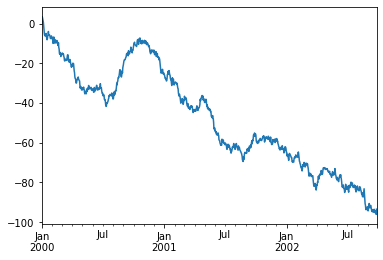

In [136]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

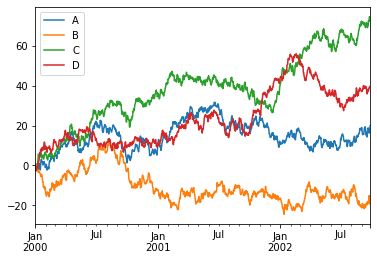

In [137]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [138]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [139]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.998923,0.168604,0.170211,-0.436701
1,2000-01-02,-1.464635,-0.105946,-1.467187,-0.565241
2,2000-01-03,-1.257233,0.897367,-1.888986,-2.658072
3,2000-01-04,-1.154483,-0.146230,-2.118911,-2.658375
4,2000-01-05,0.060791,-0.694277,-0.976551,-0.958731
...,...,...,...,...,...
995,2002-09-22,17.608003,-16.911542,72.133826,38.332670
996,2002-09-23,16.209986,-15.091473,73.049977,39.036965
997,2002-09-24,18.081292,-17.325414,74.549589,39.157789
998,2002-09-25,17.336293,-18.211289,73.864364,39.559690


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [140]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [141]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.998923,0.168604,0.170211,-0.436701
1,2000-01-02,-1.464635,-0.105946,-1.467187,-0.565241
2,2000-01-03,-1.257233,0.897367,-1.888986,-2.658072
3,2000-01-04,-1.154483,-0.146230,-2.118911,-2.658375
4,2000-01-05,0.060791,-0.694277,-0.976551,-0.958731
...,...,...,...,...,...
995,2002-09-22,17.608003,-16.911542,72.133826,38.332670
996,2002-09-23,16.209986,-15.091473,73.049977,39.036965
997,2002-09-24,18.081292,-17.325414,74.549589,39.157789
998,2002-09-25,17.336293,-18.211289,73.864364,39.559690
